# **AIN429 Final Project**
# A Predictive Model for Accurate Classification of Different Types of Diabetes
### Sıla Keskin 2210765032
### Kağan Canerik 2210765031

## **Dataset Import, Preprocessing, and Analysis**

In [1]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, recall_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading Dataset**

In [2]:
file_path = 'diabetes_dataset00.csv'
df = pd.read_csv(file_path)

df = df.rename(columns={'Target': 'Types of Diabetes'})

pd.set_option('display.max_columns', None)

display(df.head())

,Types of Diabetes,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Ethnicity,Socioeconomic Factors,Smoking Status,Alcohol Consumption,Glucose Tolerance Test,History of PCOS,Previous Gestational Diabetes,Pregnancy History,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,124,201,50,168,Low Risk,Medium,Smoker,High,Normal,No,No,Normal,18,36,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,73,121,24,178,Low Risk,High,Non-Smoker,Moderate,Normal,Yes,No,Normal,8,26,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,121,185,36,105,Low Risk,Medium,Smoker,High,Abnormal,Yes,No,Normal,15,56,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,100,151,29,121,Low Risk,High,Smoker,Moderate,Abnormal,No,Yes,Normal,12,49,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,103,146,33,289,Low Risk,Low,Smoker,Moderate,Normal,No,Yes,Complications,2,10,41,No,No,Positive,1,Normal,24,Protein Present,1770,No


In [3]:
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Types of Diabetes              70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Insulin Levels                 70000 non-null  int64 
 6   Age                            70000 non-null  int64 
 7   BMI                            70000 non-null  int64 
 8   Physical Activity              70000 non-null  object
 9   Dietary Habits                 70000 non-null  object
 10  Blood Pressure                 70000 non-null  int64 
 11  Cholesterol Levels             70000 non-null  int64 
 12  Waist Circumference            70000 non-null 

## **Exploratory Data Analysis**

We created a pie chart to visualize the distribution of diabetes types in our dataset. First, we calculated the count of each diabetes type using the value_counts() function. Then, we plotted a pie chart with percentages displayed for each category, using a color palette to make the segments visually distinct. This allowed us to understand the proportion of each diabetes type in our data.

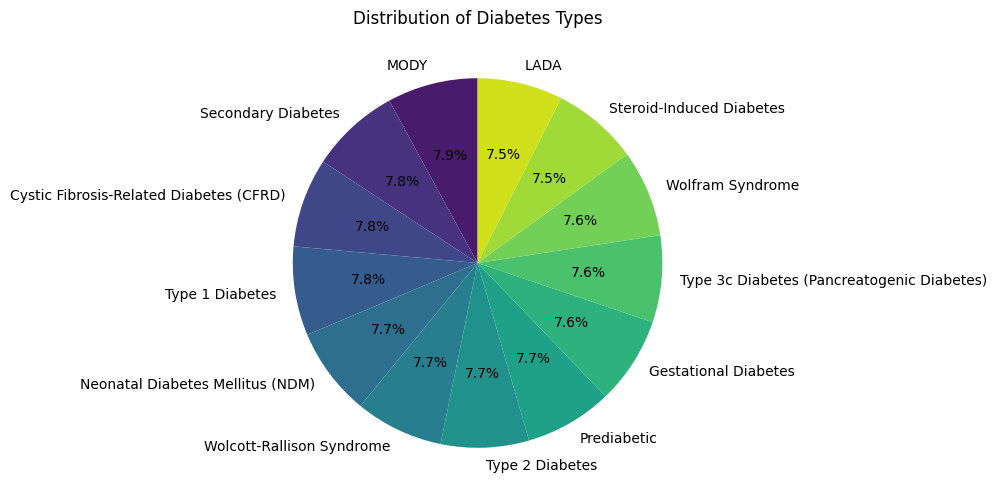

In [4]:
diabetes_counts = df['Types of Diabetes'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(diabetes_counts)))
plt.title('Distribution of Diabetes Types')
plt.show()

Classes are distributed equally. This makes us think if the dataset is synthetic.

### **Preprocessing**

We started by creating a copy of the original DataFrame, naming it processed_df, to ensure the original data remained untouched during preprocessing. We identified all categorical columns in the dataset and convert them into numerical values. For the Types of Diabetes column, we encoded it separately and stored its mappings for reference in a dictionary. Then normalized all numerical columns. We  standardized the data. After completing the encoding and normalization steps, we converted all columns  to the float64 data type to maintain consistency.This process prepared the dataset for further analysis and machine learning, while preserving the original data.

In [5]:
processed_df = df.copy()

categorical_cols = processed_df.select_dtypes(include=['object']).columns
label_encoders = {}
label_mappings = {}

for col in categorical_cols:
    if col != 'Types of Diabetes': 
        le = LabelEncoder()
        processed_df[col] = le.fit_transform(processed_df[col])
        label_encoders[col] = le
        label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

if 'Types of Diabetes' in categorical_cols:
    le = LabelEncoder()
    processed_df['Types of Diabetes'] = le.fit_transform(processed_df['Types of Diabetes'])
    label_encoders['Types of Diabetes'] = le
    label_mappings['Types of Diabetes'] = dict(zip(le.classes_, le.transform(le.classes_)))

numerical_cols = processed_df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols[numerical_cols != 'Types of Diabetes'] 
scaler = StandardScaler()

processed_df[numerical_cols] = scaler.fit_transform(processed_df[numerical_cols])

processed_df = processed_df.astype('float64')

processed_df.head()


,Types of Diabetes,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Ethnicity,Socioeconomic Factors,Smoking Status,Alcohol Consumption,Glucose Tolerance Test,History of PCOS,Previous Gestational Diabetes,Pregnancy History,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,7.0,1.0,0.0,0.0,1.0,1.705261,0.569277,2.197644,0.0,0.0,0.634773,0.137716,2.197183,0.151527,1.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.259896,-0.578659,0.479322,0.0,0.0,1.0,1.758207,1.0,0.494018,1.0,-0.655702,0.0
1,4.0,1.0,0.0,0.0,1.0,-0.798037,-1.474156,-1.294096,0.0,0.0,-1.922277,-1.658739,-1.624429,0.359146,1.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,-0.778199,-1.079046,-0.857855,1.0,0.0,0.0,-1.182325,1.0,-0.949955,0.0,-1.703567,1.0
2,5.0,1.0,1.0,1.0,1.0,0.499969,0.189103,-0.130183,0.0,1.0,0.484358,-0.221575,0.139392,-1.156471,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.051533,0.422114,0.813616,1.0,0.0,0.0,-1.182325,0.0,0.442447,1.0,0.735381,1.0
3,8.0,0.0,1.0,0.0,1.0,-1.261610,-1.189026,-1.460369,1.0,1.0,-0.568545,-0.985068,-0.889503,-0.824281,1.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,-0.362961,0.071843,1.565777,1.0,0.0,1.0,0.287941,0.0,0.700299,1.0,0.623310,0.0
4,12.0,0.0,0.0,1.0,1.0,-0.427178,-1.046461,-1.294096,0.0,0.0,-0.418130,-1.097347,-0.301563,2.663714,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,-1.401056,-1.879665,-2.445751,0.0,0.0,1.0,-1.182325,1.0,-1.156237,3.0,-1.859066,0.0


In [6]:
print(label_mappings['Types of Diabetes'])

{'Cystic Fibrosis-Related Diabetes (CFRD)': 0, 'Gestational Diabetes': 1, 'LADA': 2, 'MODY': 3, 'Neonatal Diabetes Mellitus (NDM)': 4, 'Prediabetic': 5, 'Secondary Diabetes': 6, 'Steroid-Induced Diabetes': 7, 'Type 1 Diabetes': 8, 'Type 2 Diabetes': 9, 'Type 3c Diabetes (Pancreatogenic Diabetes)': 10, 'Wolcott-Rallison Syndrome': 11, 'Wolfram Syndrome': 12}


In [7]:
steroid_df = processed_df[processed_df["Types of Diabetes"] == 7]
display(steroid_df.head())
steroid_df.shape

,Types of Diabetes,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Ethnicity,Socioeconomic Factors,Smoking Status,Alcohol Consumption,Glucose Tolerance Test,History of PCOS,Previous Gestational Diabetes,Pregnancy History,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,7.0,1.0,0.0,0.0,1.0,1.705261,0.569277,2.197644,0.0,0.0,0.634773,0.137716,2.197183,0.151527,1.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.259896,-0.578659,0.479322,0.0,0.0,1.0,1.758207,1.0,0.494018,1.0,-0.655702,0.0
15,7.0,1.0,0.0,1.0,1.0,1.519831,0.996972,2.031371,1.0,1.0,0.835326,1.462602,0.874318,0.815907,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.052277,1.372849,-0.857855,0.0,1.0,0.0,0.287941,1.0,0.339306,2.0,1.599730,0.0
21,7.0,0.0,0.0,0.0,0.0,1.890690,0.569277,0.036091,2.0,0.0,0.484358,2.113817,1.168288,0.130765,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.363706,-0.278427,0.145027,0.0,0.0,0.0,0.287941,0.0,1.112863,3.0,-0.463780,0.0
30,7.0,0.0,0.0,1.0,0.0,2.076119,0.901928,1.532551,0.0,0.0,0.534497,0.991032,1.609243,-0.492091,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.778944,0.922501,-0.356414,0.0,0.0,1.0,1.758207,1.0,0.648729,3.0,1.360178,1.0
61,7.0,1.0,0.0,1.0,1.0,-0.149034,0.046538,1.698824,0.0,1.0,1.286570,0.609286,1.903213,1.251907,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.571325,0.071843,-0.690708,0.0,1.0,1.0,1.758207,1.0,-0.227969,0.0,1.063190,1.0


(5275, 34)

In [8]:
steroid_df1 = df[df["Types of Diabetes"] == 'Steroid-Induced Diabetes']
display(steroid_df1.head())
steroid_df1.shape

,Types of Diabetes,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Ethnicity,Socioeconomic Factors,Smoking Status,Alcohol Consumption,Glucose Tolerance Test,History of PCOS,Previous Gestational Diabetes,Pregnancy History,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,124,201,50,168,Low Risk,Medium,Smoker,High,Normal,No,No,Normal,18,36,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
15,Steroid-Induced Diabetes,Positive,Negative,Yes,Present,38,53,37,Low,Unhealthy,128,260,41,200,High Risk,Low,Non-Smoker,Low,Abnormal,No,No,Complications,16,75,60,No,Yes,Negative,2,Normal,53,Normal,4239,No
21,Steroid-Induced Diabetes,Negative,Negative,No,Absent,42,44,25,Moderate,Healthy,121,289,43,167,Low Risk,Medium,Smoker,Low,Normal,No,No,Complications,19,42,72,No,No,Negative,2,Abnormal,68,Protein Present,2766,No
30,Steroid-Induced Diabetes,Negative,Negative,Yes,Absent,44,51,34,High,Healthy,122,239,46,137,Low Risk,Medium,Non-Smoker,Low,Normal,No,Yes,Normal,23,66,66,No,No,Positive,3,Normal,59,Protein Present,4068,Yes
61,Steroid-Induced Diabetes,Positive,Negative,Yes,Present,20,33,35,High,Unhealthy,137,222,48,221,Low Risk,Medium,Smoker,High,Abnormal,Yes,No,Normal,21,49,62,No,Yes,Positive,3,Normal,42,Glucose Present,3856,Yes


(5275, 34)

We created 2 dataframes for Steroid Induced Diabetes to use both scaled and original data.

### **Correlation Matrix**

We created a heatmap to visualize the correlations between numerical features in the processed_df DataFrame. We calculated the correlation matrix to show the strength and direction of linear relationships between features. Using Seaborn's heatmap, we displayed the correlations with a color gradient and numerical annotations for better interpretation. This allowed us to identify highly correlated features.

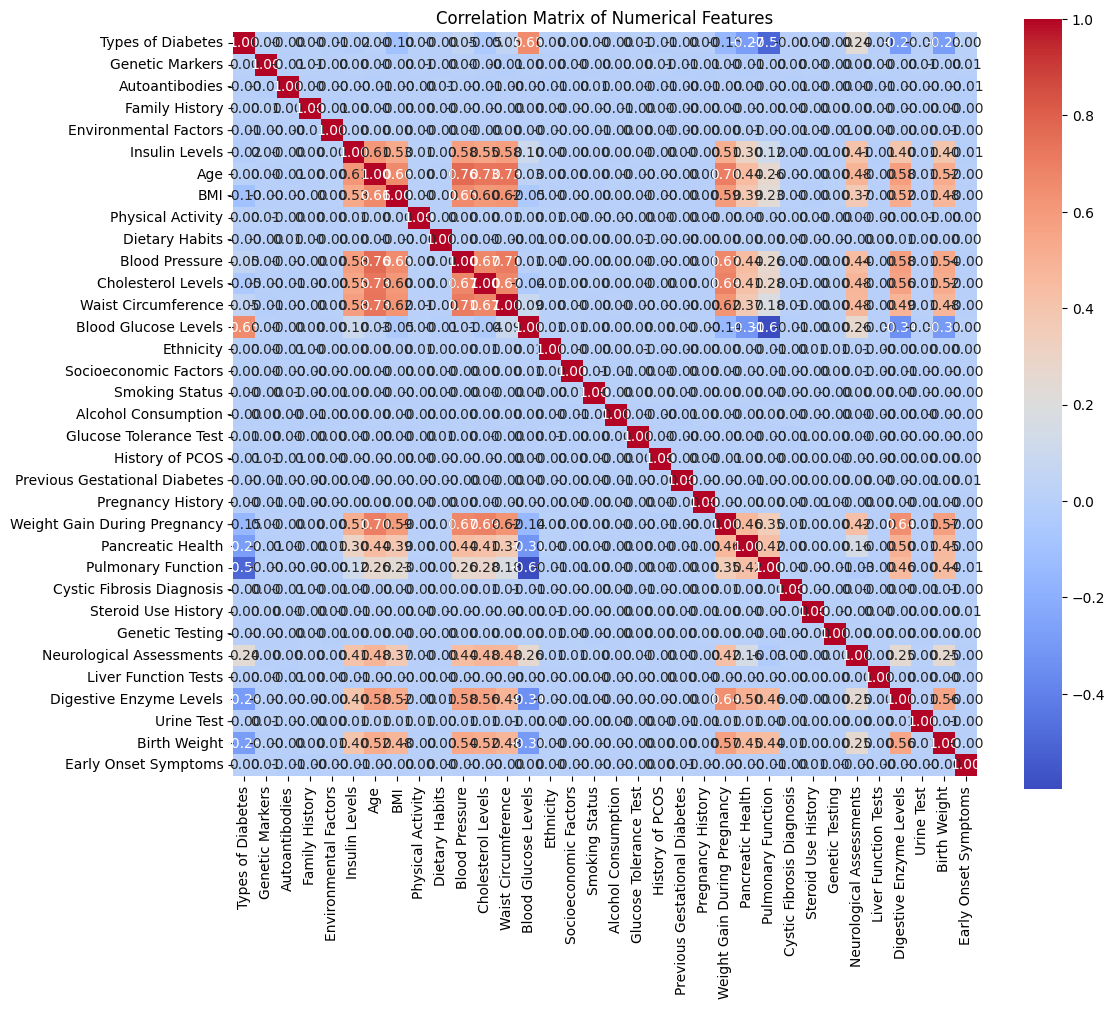

In [9]:
plt.figure(figsize=(12, 10))
correlation_matrix = processed_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

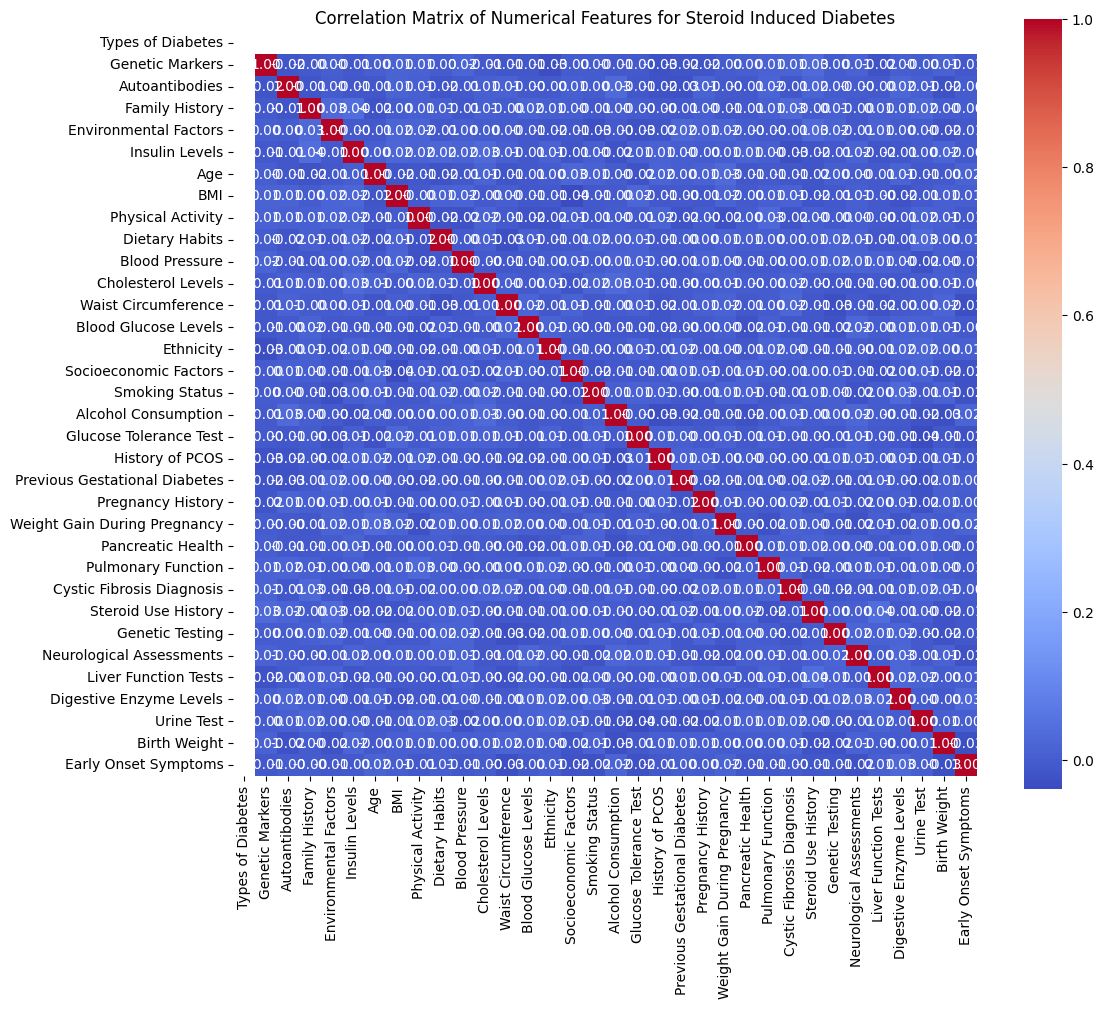

In [10]:
#correlation matrix for Steroid Induced Diabetes
plt.figure(figsize=(12, 10))
correlation_matrix2 = steroid_df.corr()
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Numerical Features for Steroid Induced Diabetes')
plt.show()

There is a super weak correlation between the features of steroid_df data frame.

We calculated the correlations of all features with the Types of Diabetes target variable. First, we dropped the correlation of Types of Diabetes with itself from the correlation matrix. Then, we sorted the remaining correlations in descending order based on their absolute values to identify the features most strongly related to the target variable. Finally, we retrieved the original correlation values for the sorted features and printed them for analysis. This process helps highlight the most relevant features for predicting Types of Diabetes.

In [11]:
correlation_with_target = correlation_matrix["Types of Diabetes"].drop("Types of Diabetes")
sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

sorted_correlation = correlation_with_target.loc[sorted_correlation.index]
print(sorted_correlation)

Blood Glucose Levels             0.652425
Pulmonary Function              -0.501665
Digestive Enzyme Levels         -0.288984
Birth Weight                    -0.282754
Pancreatic Health               -0.273879
Neurological Assessments         0.238511
Weight Gain During Pregnancy    -0.149643
BMI                             -0.098850
Cholesterol Levels              -0.052360
Blood Pressure                   0.050899
Waist Circumference              0.046651
Insulin Levels                  -0.015196
Glucose Tolerance Test           0.007535
History of PCOS                 -0.006112
Environmental Factors           -0.005690
Early Onset Symptoms             0.004555
Genetic Markers                  0.004078
Cystic Fibrosis Diagnosis       -0.003408
Genetic Testing                 -0.003029
Physical Activity                0.002664
Socioeconomic Factors            0.002260
Dietary Habits                  -0.002253
Alcohol Consumption             -0.002141
Family History                   0

In this code, we created violin plots to visualize the distribution of the top 5 features most correlated with the Types of Diabetes target variable. These features were selected based on the correlation matrix, identifying those with the highest absolute correlation values. The selected columns (Blood Glucose Levels, Pulmonary Function, Digestive Enzyme Levels, Birth Weight, and Pancreatic Health) are plotted against the Types of Diabetes column. Each plot shows the distribution of values for the feature across different types of diabetes, with color coding applied to distinguish the types. The x-axis represents the diabetes types, while the y-axis represents the feature values. Finally, we used plt.tight_layout() to organize the plots neatly and displayed them together. This visualization helps to understand how the most correlated features vary across diabetes types.

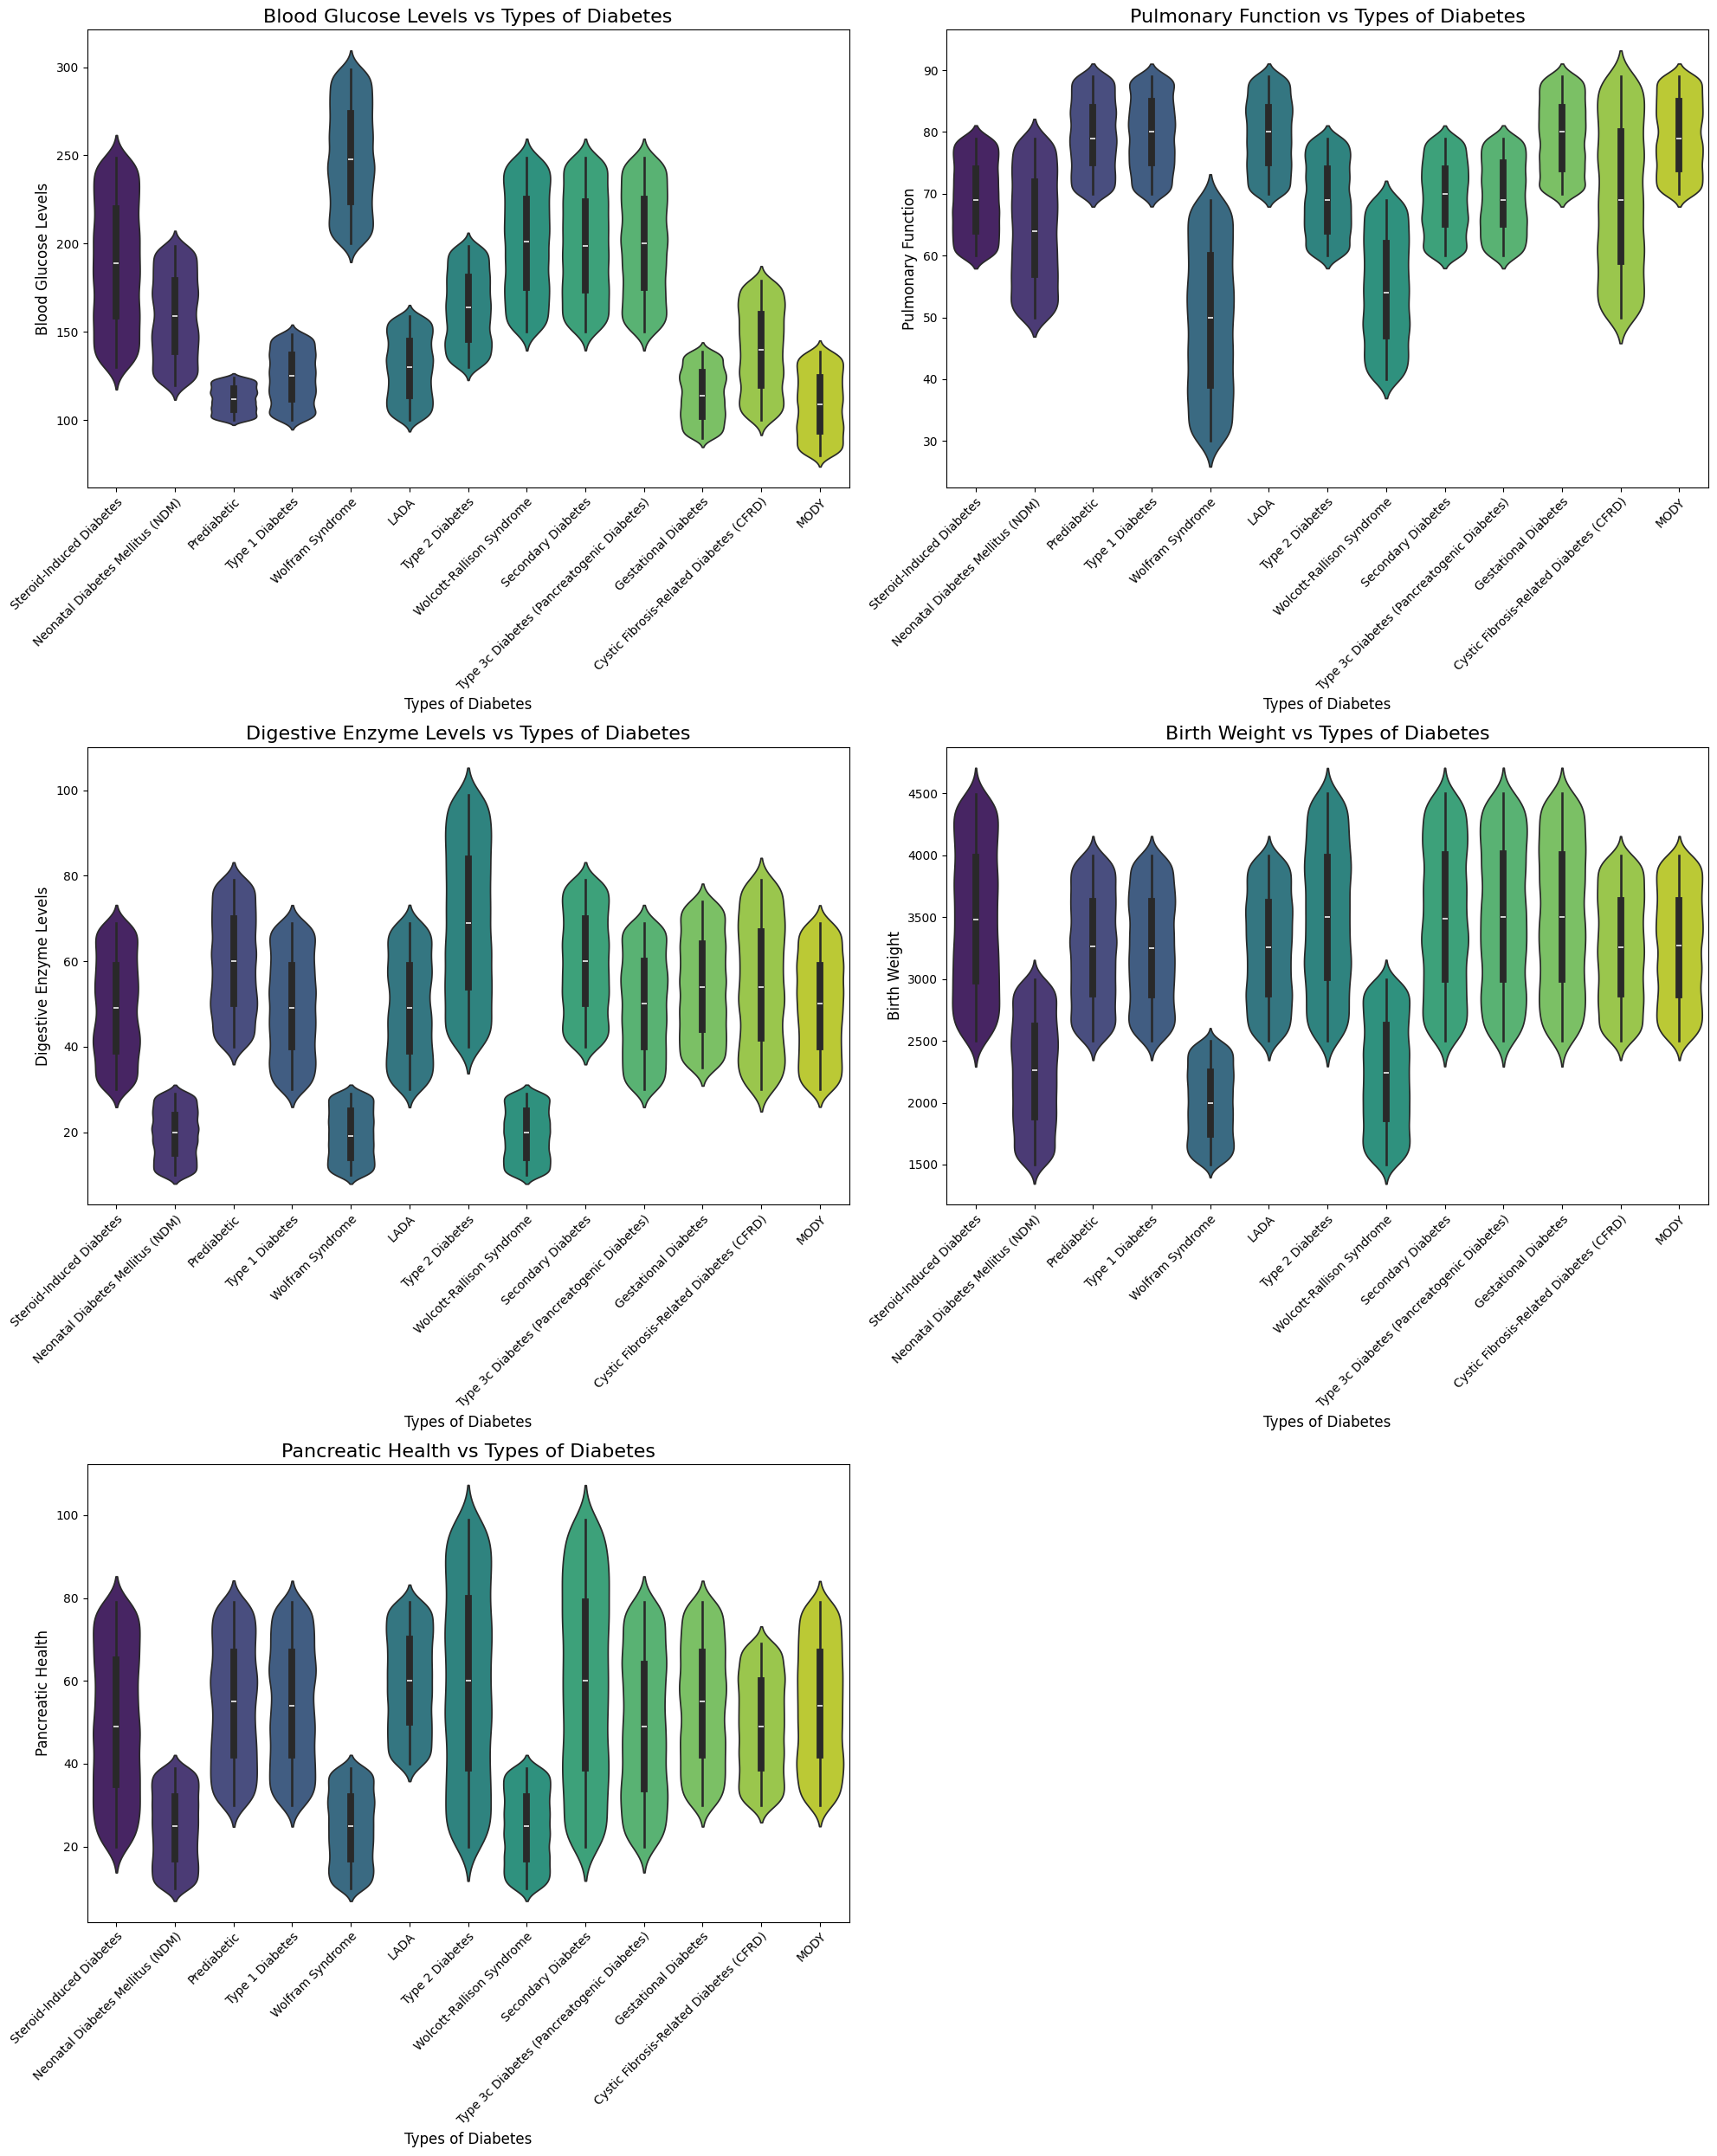

In [12]:
plt.figure(figsize=(20, 25))

selected_cols = ["Blood Glucose Levels", "Pulmonary Function", "Digestive Enzyme Levels", "Birth Weight", "Pancreatic Health"]

for i, col in enumerate(selected_cols, 1):
    plt.subplot(3, 2, i)
    sns.violinplot(data=df, x='Types of Diabetes', y=col, hue='Types of Diabetes', palette='viridis', legend=False)
    plt.title(f'{col} vs Types of Diabetes', fontsize=16)
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=10)  
    plt.xlabel('Types of Diabetes', fontsize=12)
    plt.ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()

Blood Glucose Levels varies for different types of diabetes. For Neonatal Diabetes Mellitus (NDM), Wolcott-Rallison Syndrome and Wolfram Syndrome, birth weights are less than others. Neonatal Diabetes Mellitus (NDM) and Wolcott-Rallison Syndrome  are seen in babies so this makes sense. Wolfram syndrome is a genetic disease. That may affect  birth weights. Pancreatic Health and Digestive Enzyme are also low for the patients of these 3 diabetes types.


**Some Extra Visualizations**

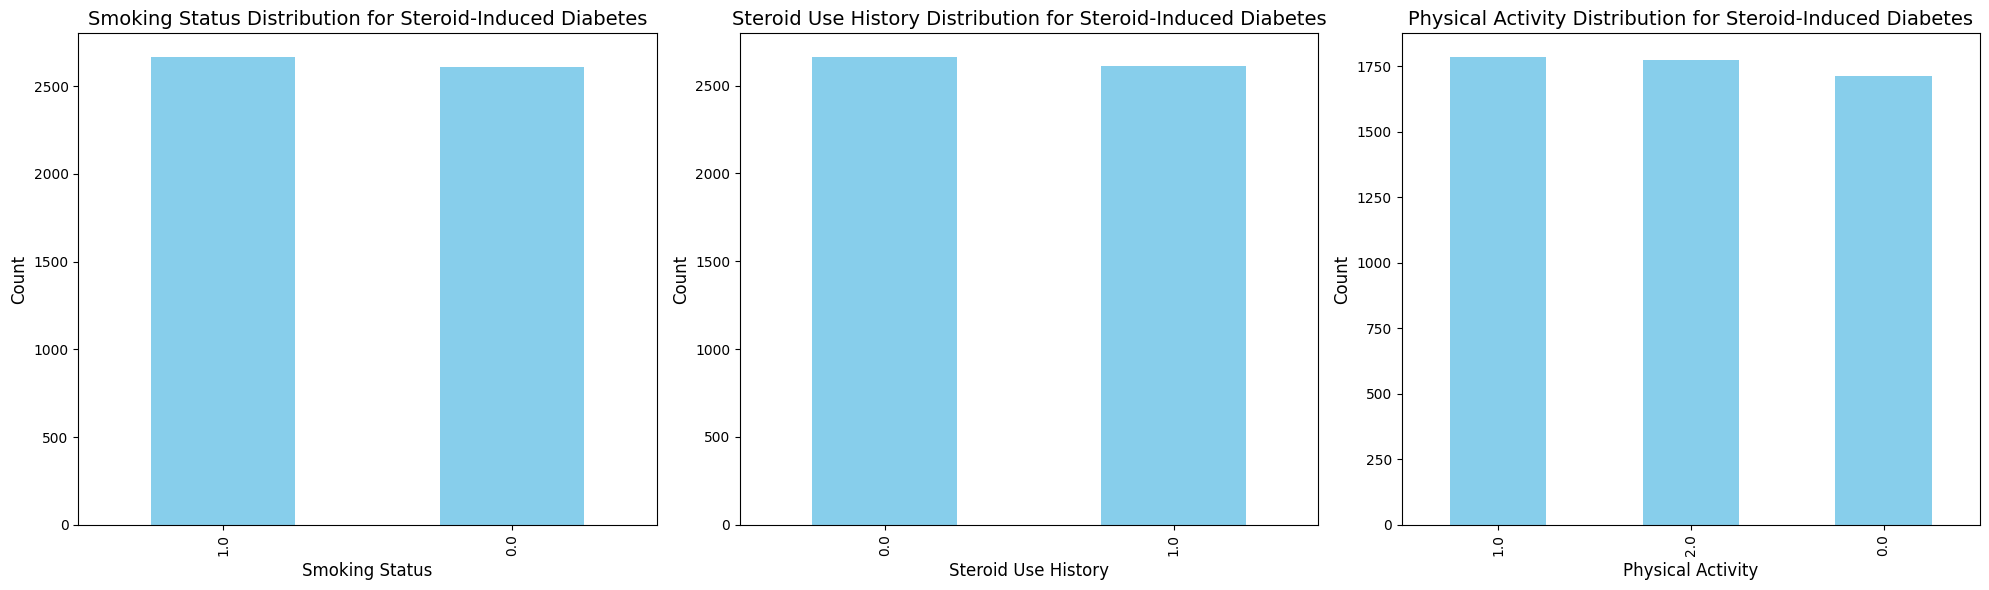

In [13]:
import matplotlib.pyplot as plt

features = {
    'Smoking Status': 'Smoking Status Distribution for Steroid-Induced Diabetes',
    'Steroid Use History': 'Steroid Use History Distribution for Steroid-Induced Diabetes',
    'Physical Activity': 'Physical Activity Distribution for Steroid-Induced Diabetes'
}

fig, axes = plt.subplots(1, 3, figsize=(20, 6))  

for ax, (feature, title) in zip(axes, features.items()):
    distribution = steroid_df[feature].value_counts()
    distribution.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

plt.tight_layout() 
plt.show()

Features are distributed equally. Classes are distributed equally too as we can see from pie chart in EDA part. The data in the graphs are from steroid_df which only contains Steroid Induced Diabetes patients. The graphs are suspicious because steroid use history is equally distributed. Physical activity is also nearly equally distributed. Let's check relationship between steroid use history and physical activity.

In [14]:
contingency_table = pd.crosstab(steroid_df['Physical Activity'], steroid_df['Steroid Use History'])

In [15]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test Statistic: {chi2:.2f}, p-value: {p:.3f}")


Chi-Square Test Statistic: 0.80, p-value: 0.670


The data does not provide enough evidence to suggest that Physical Activity and Steroid Use History are related. In simpler terms, these two features appear to be independent in this dataset.

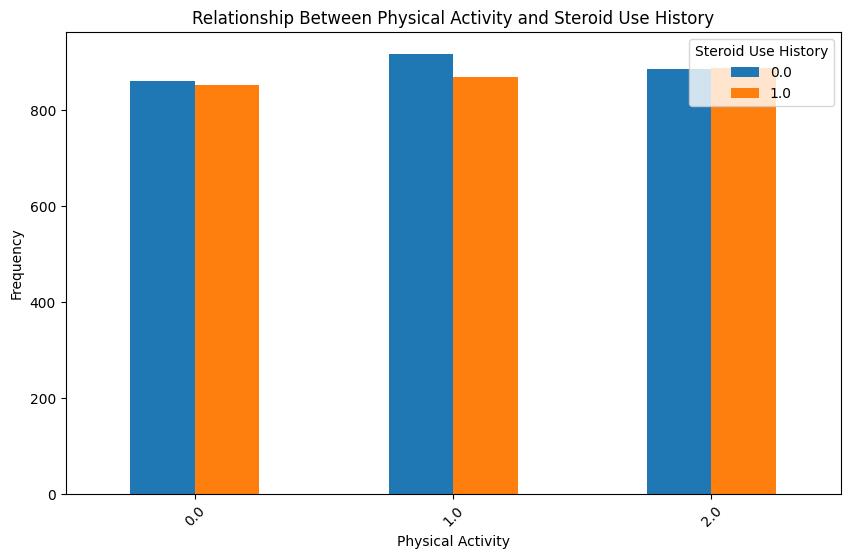

In [16]:
contingency_table.plot(kind='bar', figsize=(10, 6))
plt.title('Relationship Between Physical Activity and Steroid Use History')
plt.xlabel('Physical Activity')
plt.ylabel('Frequency')
plt.legend(title='Steroid Use History')
plt.xticks(rotation=45)
plt.show()


***People who have 0 physical activity use steroid, and the distribution is equally again. This doesn't make sense. That led us to think that the data set was synthetic.***

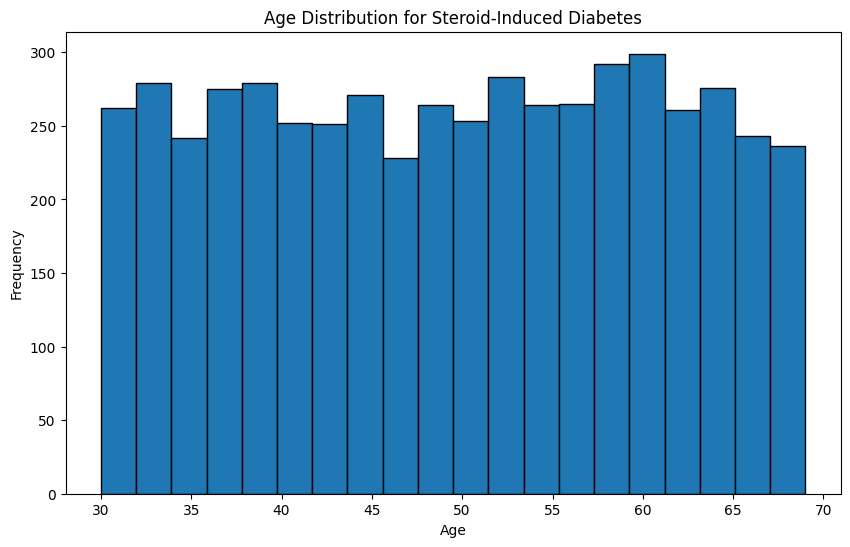

In [17]:
plt.figure(figsize=(10, 6))
steroid_df1['Age'].hist(bins=20, edgecolor='black')
plt.title('Age Distribution for Steroid-Induced Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

## **Supervised Learning**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
df = processed_df
X = df.drop(columns=['Types of Diabetes'])  
y = df['Types of Diabetes']  

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs'),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

metrics_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test) 
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    metrics_dict = {
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F-1 Score": f1
    }
    metrics_list.append(metrics_dict)

for k in range(1, 22, 2):  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test) 
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    metrics_dict = {
        "Model": f"kNN (k={k})",
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F-1 Score": f1
    }
    metrics_list.append(metrics_dict)
metrics_df = pd.DataFrame(metrics_list)



In [20]:
display(metrics_df)

,Model,Accuracy,Precision,Recall,F-1 Score
0,Logistic Regression,0.761929,0.761323,0.761929,0.761457
1,Random Forest,0.900714,0.906222,0.900714,0.899615
2,SVM,0.782429,0.783171,0.782429,0.781769
3,kNN (k=1),0.428571,0.429367,0.428571,0.426531
4,kNN (k=3),0.453214,0.472813,0.453214,0.452540
5,kNN (k=5),0.498714,0.504733,0.498714,0.498304
6,kNN (k=7),0.523643,0.531321,0.523643,0.523072
7,kNN (k=9),0.540571,0.548706,0.540571,0.539090
8,kNN (k=11),0.552500,0.563309,0.552500,0.550585
9,kNN (k=13),0.562786,0.573012,0.562786,0.560209


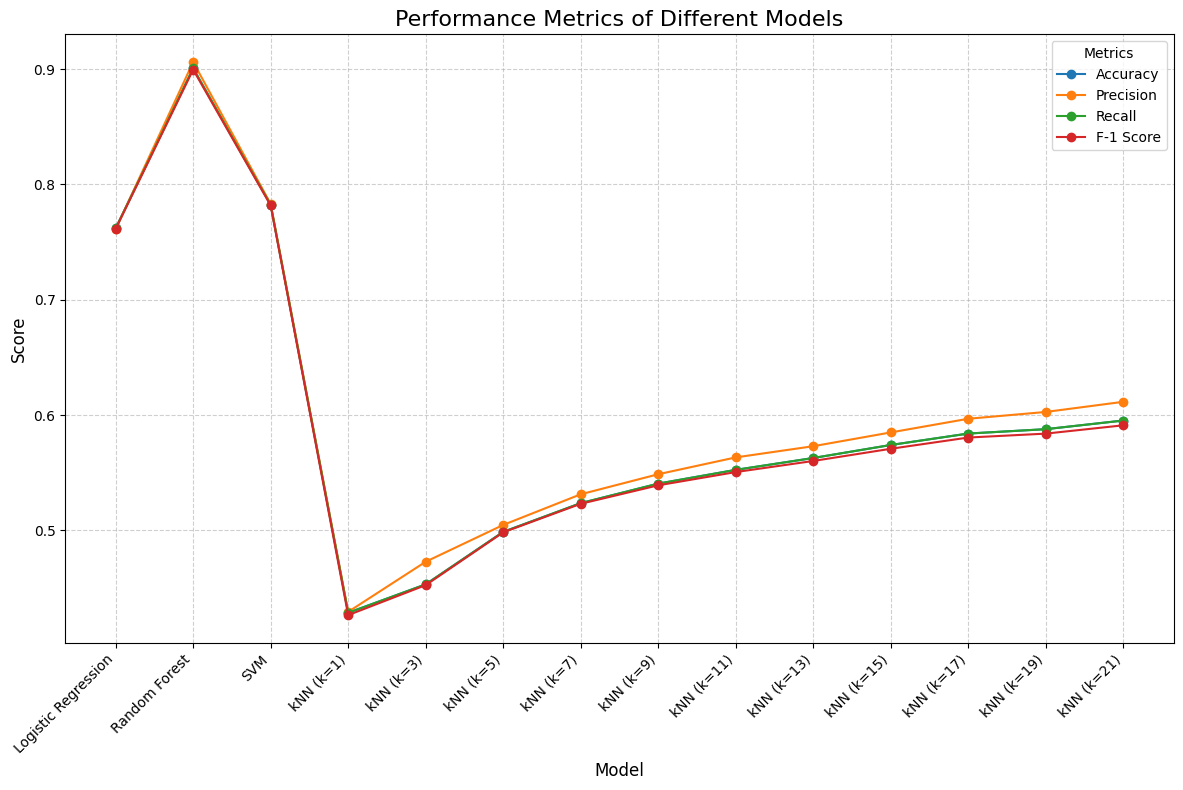

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for metric in ["Accuracy", "Precision", "Recall", "F-1 Score"]:
    plt.plot(metrics_df["Model"], metrics_df[metric], marker='o', label=metric)

plt.title("Performance Metrics of Different Models", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title="Metrics", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


Having studied all the possible ways of making a predictive model for our purposes, We can state that the best was Random Forest with 89.7% of prediction accuracy and probably the most reliable with high precision, explanations, and F1 scores. Logistic Regression and SVM were next in accuracy with 76.1% and 78.2%, respectively. They did reasonably well in all metrics. As for kNN, we experimented with different k values starting with 1 up to 21. We will that the more k increased, the better accuracy and the highest accuracy (59.5%) were received on k=21. Not often, kNN had lower performance over other models that is not quite fitted to this dataset. Overall, Random Forest is the most effective model. Logistic Regression and SVM also are the models to consider. The kNN model, despite showing some improvement with higher k values, remains less competitive.

# Unsupervised Learning

In [21]:
numeric_df = processed_df.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)


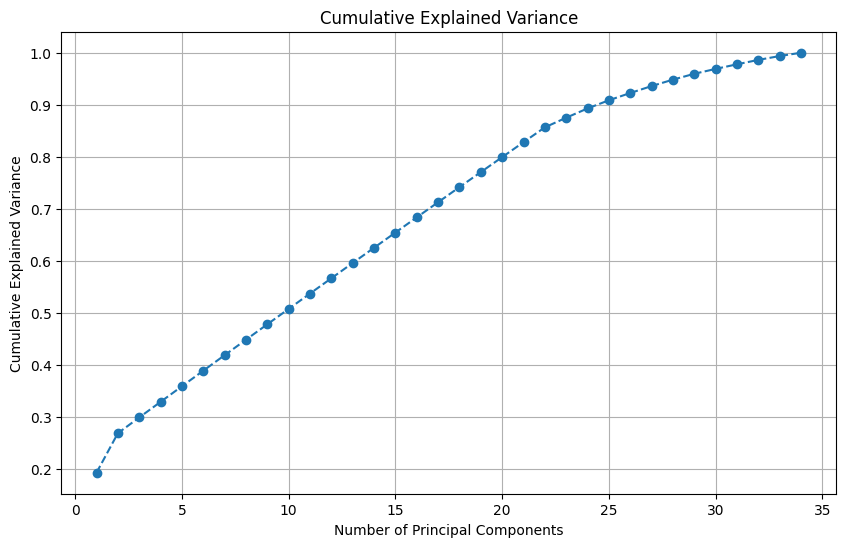

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(scaled_data)

cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()


for retaining 90% of the variance, component count that we need is 24. The data has high dimensionality with many features contributing to the variance. 

In [23]:
pca = PCA(n_components=24)
pca_data = pca.fit_transform(scaled_data)

In [24]:
clusters = 13 
kmeans = KMeans(n_clusters=clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
df['KMeans_Cluster'] = kmeans_labels

kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
print(f"K-Means Silhouette Score : {kmeans_silhouette:.2f}")

K-Means Silhouette Score : 0.04


In [25]:
clusters = 13  
kmeans = KMeans(n_clusters=clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data)
df['KMeans_Cluster'] = kmeans_labels

kmeans_silhouette2 = silhouette_score(pca_data, kmeans_labels)
print(f"K-Means Silhouette Score with pca: {kmeans_silhouette2:.2f}")



K-Means Silhouette Score with pca: 0.04


In [26]:
df['KMeans_Cluster'] = kmeans_labels
df

,Types of Diabetes,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Ethnicity,Socioeconomic Factors,Smoking Status,Alcohol Consumption,Glucose Tolerance Test,History of PCOS,Previous Gestational Diabetes,Pregnancy History,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms,KMeans_Cluster
0,7.0,1.0,0.0,0.0,1.0,1.705261,0.569277,2.197644,0.0,0.0,0.634773,0.137716,2.197183,0.151527,1.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.259896,-0.578659,0.479322,0.0,0.0,1.0,1.758207,1.0,0.494018,1.0,-0.655702,0.0,10
1,4.0,1.0,0.0,0.0,1.0,-0.798037,-1.474156,-1.294096,0.0,0.0,-1.922277,-1.658739,-1.624429,0.359146,1.0,0.0,0.0,2.0,1.0,1.0,0.0,1.0,-0.778199,-1.079046,-0.857855,1.0,0.0,0.0,-1.182325,1.0,-0.949955,0.0,-1.703567,1.0,8
2,5.0,1.0,1.0,1.0,1.0,0.499969,0.189103,-0.130183,0.0,1.0,0.484358,-0.221575,0.139392,-1.156471,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,-0.051533,0.422114,0.813616,1.0,0.0,0.0,-1.182325,0.0,0.442447,1.0,0.735381,1.0,6
3,8.0,0.0,1.0,0.0,1.0,-1.261610,-1.189026,-1.460369,1.0,1.0,-0.568545,-0.985068,-0.889503,-0.824281,1.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,-0.362961,0.071843,1.565777,1.0,0.0,1.0,0.287941,0.0,0.700299,1.0,0.623310,0.0,2
4,12.0,0.0,0.0,1.0,1.0,-0.427178,-1.046461,-1.294096,0.0,0.0,-0.418130,-1.097347,-0.301563,2.663714,1.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,-1.401056,-1.879665,-2.445751,0.0,0.0,1.0,-1.182325,1.0,-1.156237,3.0,-1.859066,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,7.0,0.0,0.0,1.0,1.0,0.221825,0.284146,1.698824,0.0,1.0,0.835326,2.338374,0.727333,1.376478,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.882753,-0.828853,0.061454,1.0,1.0,1.0,0.287941,0.0,-0.640532,2.0,-0.731350,0.0,1
69996,2.0,1.0,1.0,0.0,0.0,-0.056319,0.901928,1.033731,1.0,1.0,0.684911,-0.782967,1.315273,-0.242948,1.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,-0.051533,1.072617,0.980763,1.0,1.0,0.0,-1.182325,0.0,0.597159,1.0,-0.133170,0.0,4
69997,8.0,1.0,0.0,0.0,0.0,-0.334463,-0.998939,-1.626643,1.0,1.0,-0.317854,-0.940157,-0.595533,-0.367520,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.778944,-0.428543,0.562895,1.0,1.0,1.0,0.287941,1.0,0.339306,3.0,0.694756,0.0,2
69998,0.0,1.0,0.0,0.0,0.0,0.963543,-0.096027,-0.130183,0.0,0.0,-0.017024,-0.401220,-0.301563,-0.720472,0.0,1.0,0.0,2.0,1.0,0.0,0.0,1.0,0.571325,0.271998,-0.022120,0.0,0.0,1.0,-1.182325,0.0,-0.588962,1.0,-0.707535,1.0,11


In [27]:
contingency_table = pd.crosstab(df['Types of Diabetes'], df['KMeans_Cluster'])
print(contingency_table)


KMeans_Cluster       0     1     2     3     4     5    6     7     8     9   \
Types of Diabetes                                                              
0.0                   0     0     6  1360  1427     0  666     0     0     0   
1.0                   0     0     1  1341  1353     0  676     0     0     0   
2.0                   0     1     2  1309  1323     0  638     0     0     1   
3.0                   0     0   464  1118  1303     0  724     0     0     0   
4.0                   0     0     0     0     0     0    0     0  5408     0   
5.0                   0     1     0  1373  1275     0  687     1     0     1   
6.0                   0  1358     0     5     2     0    4  1358     0  1378   
7.0                   0  1313     0     0     3     0    2  1325     0  1282   
8.0                   0     0  4416    68   132     0  303     0     2     0   
9.0                   0  1317     0     0     0     0    0  1338     0  1416   
10.0                  0  1369     0     

In [28]:
import numpy as np

matches = df.idxmax(axis=1)  
correct_assignments = 0

for diabetes_type, cluster in matches.items():
    correct_assignments += df.loc[diabetes_type, cluster]

total_samples = df.values.sum()

accuracy = correct_assignments / total_samples
print(f"Clustering Accuracy: {accuracy:.2f}")


Clustering Accuracy: 0.34


In [29]:
clusters3 = 3 
kmeans = KMeans(n_clusters=clusters3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)

kmeans_silhouette3 = silhouette_score(scaled_data, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette3:.2f}")

K-Means Silhouette Score: 0.12


In [34]:
# Hierarchical Clustering
"""
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters)
hierarchical_labels = hierarchical.fit_predict(scaled_data)
df['Hierarchical_Cluster'] = hierarchical_labels

hierarchical_silhouette = silhouette_score(scaled_data, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.2f}")"""



subset_data = scaled_data[:3000]  

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(subset_data)



hierarchical_silhouette = silhouette_score(subset_data, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.2f}")

Hierarchical Clustering Silhouette Score: 0.12


We used the first 8000 samples as an example because it crashed my ram before :'(

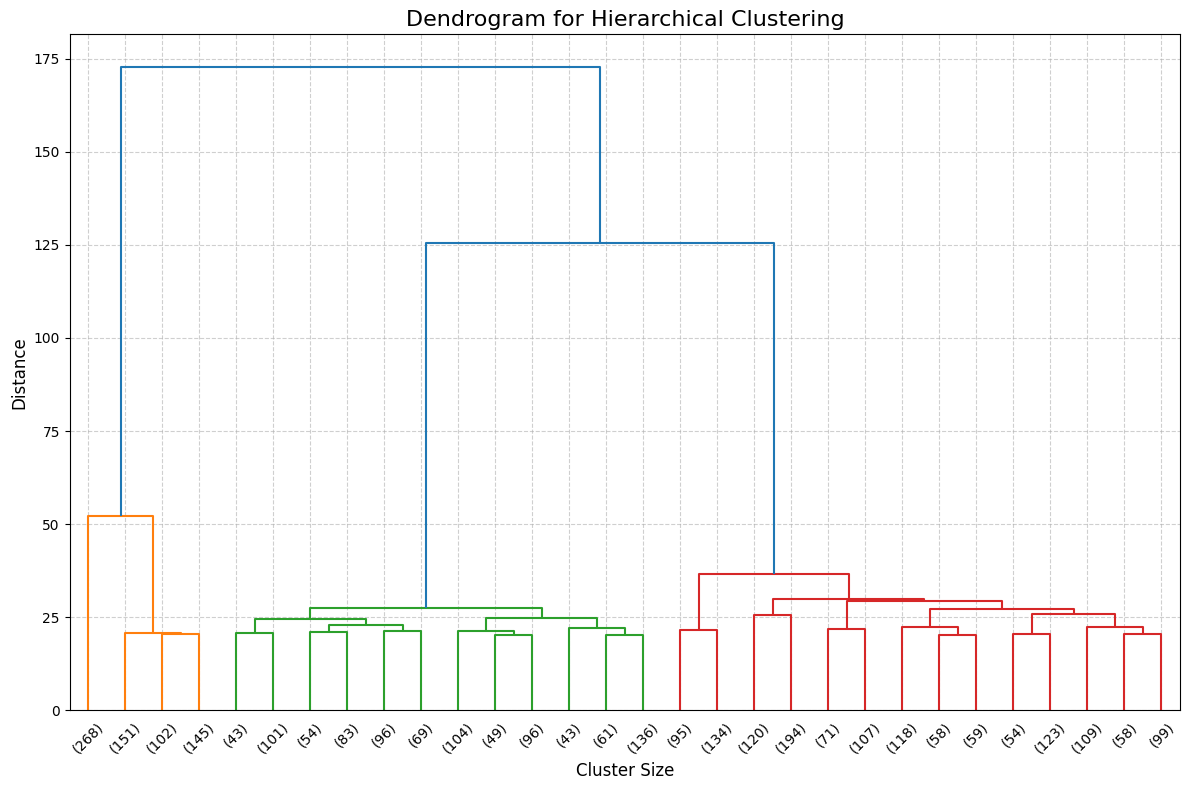

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering for the dendrogram
linked = linkage(subset_data, method='ward')  # Ward's method is commonly used

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=45, leaf_font_size=10)
plt.title("Dendrogram for Hierarchical Clustering", fontsize=16)
plt.xlabel("Cluster Size", fontsize=12)
plt.ylabel("Distance", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [35]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  
dbscan_labels = dbscan.fit_predict(scaled_data)

if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(scaled_data, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.2f}")
else:
    print("DBSCAN did not form meaningful clusters.")


DBSCAN did not form meaningful clusters.


In [40]:
from sklearn.metrics import adjusted_rand_score
dbscan = DBSCAN(eps=4.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
df['DBSCAN_Cluster'] = dbscan_labels

if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(scaled_data, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.2f}")
else:
    print("DBSCAN did not form meaningful clusters.")
    
ari_score = adjusted_rand_score(df['Types of Diabetes'], df['DBSCAN_Cluster'])
print(f"DBSCAN Adjusted Rand Index (ARI): {ari_score:.2f}")

DBSCAN Silhouette Score: -0.04
DBSCAN Adjusted Rand Index (ARI): 0.00


In [41]:
from sklearn.metrics import adjusted_rand_score
dbscan = DBSCAN(eps=4.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_data)
df['DBSCAN_Cluster'] = dbscan_labels


if len(set(dbscan_labels)) > 1:
    dbscan_silhouette2 = silhouette_score(pca_data, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette2:.2f}")
else:
    print("DBSCAN did not form meaningful clusters.")
    
ari_score2 = adjusted_rand_score(df['Types of Diabetes'], df['DBSCAN_Cluster'])
print(f"DBSCAN Adjusted Rand Index (ARI): {ari_score2:.2f}")

DBSCAN did not form meaningful clusters.
DBSCAN Adjusted Rand Index (ARI): 0.00


High-dimensional data can make DBSCAN less effective. 0.00 ari means clustering is as bad as random clustering.

In [42]:
print(f"K-Means Silhouette Score 13 clusters: {kmeans_silhouette:.2f}")
print(f"K-Means Silhouette Score with PCA 13 clusters: {kmeans_silhouette2:.2f}")
print(f"Clustering Accuracy:{accuracy:.2f}")
print(f"K-Means Silhouette Score 3 clusters: {kmeans_silhouette3:.2f}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.2f}")
print(f"DBSCAN ARI Score: {ari_score:.2f}")
print(f"Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.2f}")

K-Means Silhouette Score 13 clusters: 0.04
K-Means Silhouette Score with PCA 13 clusters: 0.04
Clustering Accuracy:0.34
K-Means Silhouette Score 3 clusters: 0.12
DBSCAN Silhouette Score: -0.04
DBSCAN ARI Score: 0.00
Hierarchical Clustering Silhouette Score: 0.12


#### K-MEANS
We selected number of classes as 13 because in the dataset, there  were 13 types of diabetes in the dataset. K-means silhouette 0.04 shows very poor clustering. The score is close to 0, that suggests overlapping or poorly separated clusters. With 0.12 silhouette score, 3 clusters may capture slightly better-defined groupings than 13 clusters. We tried to calculate accuracy from the clusters.  To see if there is any relationship between the counts of clustering classes and the real classes we printed a contingency table. Then we wrote an algorithm to match the classes in the table. And then we calculate a score of accuracy from that values.

#### DBSCAN
A negative score shows that points are closer to points in another clusters than their own cluster. Clusters are noisy. 0.00 ARI means clustering is as bad as random clustering.

#### Hierarchical Clustering
With Hierarchical Clustering, the dataset might have weakly defined groupings, but not enough to form well-separated clusters.

-------------
Silhouette scores are too low among all the clustering models. This shows the dataset have problems with having clear clusters. High dimensionality may have effects on that. Also, as we observed, the data is synthetic. Finding patterns on a stythetic data may be hard. The features are distributed like equally everywhere. PCA with 24 components (selected for 90% variance) failed to improve K-Means performance, shows that reducing dimensionality alone did not solve the clustering issues. 